# Lecture 2/3 - Intro. to ODEs and Power Series

In [1]:
using Plots
using LaTeXStrings
using Polynomials


$$
\dot{x} = \frac{dx}{dt} = \lambda x
$$


What we want to know : what is the population as a function of time ? , that is, what is $x(t)$?

Move all $x$ to one side and integrate both sides. Integrating adds the constant C (that is, when we derive a function with respect to a variable, constants go to 0. We need to account for this when we integrate.)

$$
\int \frac{dx}{x} = \int \lambda dt
$$
$$
\ln(x(t)) = \lambda t + C
$$

That the exponent of both sides

$$
x(t) = e^{\lambda t + C}
$$

Using the property that $e^{a + b} = e^ae^b$, where k is some constant

$$
x(t) = e^{\lambda t k}
$$

What is k? This could be some initial value $x(0)$ for x at time 0.

for $x(0)$ :

$$
x(0) = e^{\lambda (0) k} = k
$$

Thus the full solution :

$$
x(t) = e^{\lambda t} x(0)
$$

This is a:
- First order : There is only a single derivative (no second or third order terms e.g., $\frac{d^2x}{dt^2}$)
- Linear : The way that $x$ changes in time is linearly proportional to single constant $\frac{dx}{dt} = \lambda x$. Versus $\frac{dx}{dt} = x^2$, this would be non-linear
- Ordinary : State x only depends only on a single independent variable ($t$)
- differential equation : an equation defined as how a function changes.

### Loan example

Suppose you borrow money at annual interest rate $r$ such that:

for yearly compounding
$$
x(1) = (1+r)\cdot x(0)
$$

Montly compounding
$$
x(1) = (1+\frac{r}{12})\cdot x(0)
$$

Daily compounding
$$
x(1) = (1+\frac{r}{365})\cdot x(0)
$$

And at the limit, as the time window $\rightarrow \inf$

$$
x(1) = \lim_{{N \to \infty}} \left(1 + \frac{r}{N}\right)^N x(0)
$$

The exponential function is defined as:

$e^r = \lim_{{N \to \infty}} \left(1 + \frac{r}{n}\right)^n$


In [2]:
r = 0.05
# compounding montly for 12 months
println((1 + (r/12))^12)

# from the exponential function, this is the best that the bank can do
println(exp(0.05))

1.051161897881733
1.0512710963760241


The loan amount $x$ is contionusly increasing at a rate $r$ proportional to the current loan ammount:

$$
\frac{dx}{dt} = rx
$$

### Radioactive decay

The mass of a radioactive material ($x$) is decreasing at a rate $\lambda$ proportional to the current mass of the material

$$
\dot{x} = -\lambda x
$$

thus, using the math from above:
$$
x(t) = e^{-\lambda t}x(0)
$$

## Taylor Series

Approximate a ''nasty'' function as a Taylor series expansions

Let $f(x + \Delta x)$ be Taylor expanded (approximated to infinite precision) about a base point $x$ if $f$ is smooth at $x$

$$
f(x + \delta x) = f(x) + \frac{df}{dx}\Delta x + \frac{d^2f}{dx^2}\frac{\Delta x}{2!} + \frac{d^3f}{dx^3}\frac{\Delta x}{3!} + ... + \frac{d^Nf}{dx^N}\frac{\Delta x}{N!}
$$

If $\Delta x$ is small, the approximation gets better and better as you add up terms.
Alternatively written as:

$$
f(x) = f(a) + \frac{df}{dx}(a)(x - a) + \frac{d^2f}{dx^2}(a) \frac{(x - a)^2}{2!} + \frac{d^3f}{dx^3}(a) \frac{(x - a)^3}{3!} +  + \frac{d^Nf}{dx^N}(a) \frac{(x - a)^N}{N!}\cdots
$$


### Example : Taylor expansion of sin(x)

$f(x) = sin(x)$ at $a = 0$

$$
f(x) = f(0) + f'(0)x + \frac{f''(0)}{2!}x^2 + \frac{f'''(0)}{3!}x^3 + \frac{f^{(4)}(0)}{4!}x^4 + \frac{f^{(5)}(0)}{5!}x^5 + \cdots
$$
$$
= \sin(0) + \cos(0) \cdot x - \frac{\sin(0)}{2!}x^2 - \frac{\cos(0)}{3!}x^3 + \frac{\sin(0)}{4!}x^4 + \frac{\cos(0)}{5!}x^5 + \cdots
$$
$$
\sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \frac{x^9}{9!} - \cdots
$$

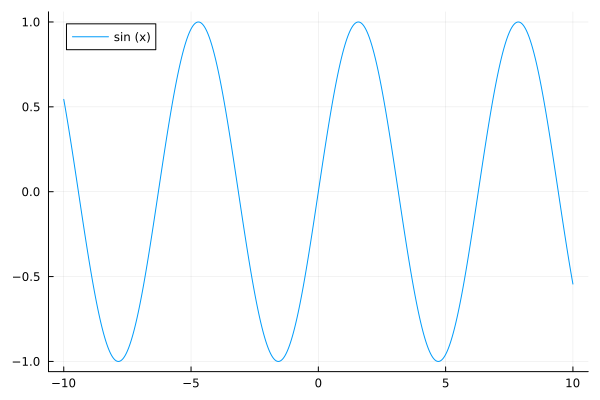

In [3]:
x = -10:0.01:10
# sin.(x): Computes the sine of each element in the range x. 
# The dot (.) before the parentheses is for broadcasting, which applies the sin function element-wise to the range.
y = sin.(x)
plot(x,y, label = "sin (x)")

First-order Taylor expansion

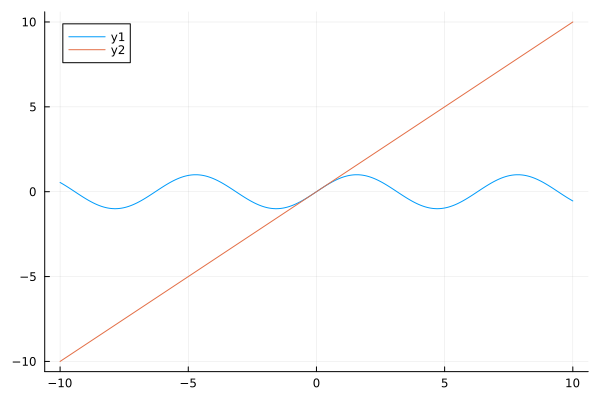

In [4]:
# Define the co-effients of the polynomial. 
# The order increases from left to right
# That is, this represents 0 + 1(x0). Where as [2,3 4] would represent 2 + 3x + 4x^2
p_coefs = [0,1]
poly = Polynomial(p_coefs)
y_poly = poly.(x)
plot(x, [y,y_poly])

Third order Taylor Expansion

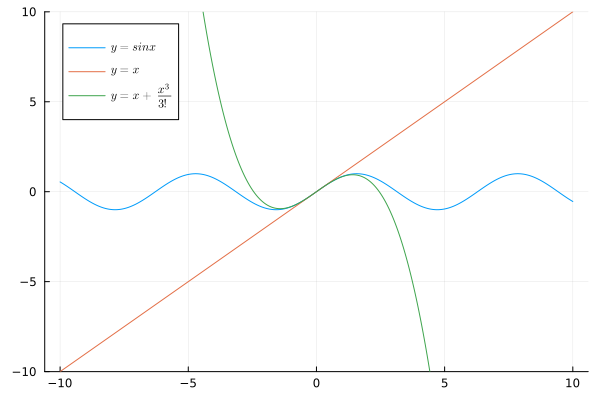

In [5]:
# 0 + x + 0x^2 + x^3
p_coefs = [0,1,0,1*(-1/factorial(3))]
poly = Polynomial(p_coefs)
y_poly_3 = poly.(x)
plot(x, [y,y_poly,y_poly_3], label = [L"$y = sin x$" L"$y = x$" L"$y = x + \frac{x^3}{3!}$"], ylim = [-10,10])

Fifth order Taylor expansion

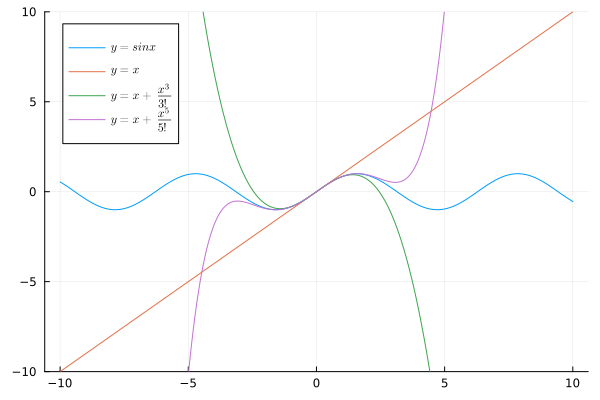

In [6]:
# 0 + x + 0x^2 + x^3
p_coefs = [0,1,0,1*(-1/factorial(3)),0,1*(1/factorial(5))]
poly = Polynomial(p_coefs)
y_poly_5 = poly.(x)
plot(x, [y,y_poly,y_poly_3,y_poly_5], label = [L"$y = sin x$" L"$y = x$" L"$y = x + \frac{x^3}{3!}$" L"$y = x + \frac{x^5}{5!}$"], ylim = [-10,10])

## Solving differential equations with Power series

Recall the solution to 
$$
\dot{x} = \frac{dx}{dt} = \lambda x
$$

as

$$
x(t) = e^{\lambda t} x(0)
$$

How did we get this solution ? 

We assume that we can expand $x(t)$ as:
$$
x(t) = C_{0} + C_{1}t + C_{2}t^2 + C_{3}t^3 + C_{4}t^4 + \dots
$$
deriving $x(t)$ gives :
$$
\dot{x} = C_{1} + 2C_{2}t + 3C_{3}t^2 + 4C_{4}t^3 + \dots
$$

and since $\dot{x} = \lambda x$

$$
\begin{align}
\dot{x} &= \lambda (C_{0} + C_{1}t + C_{2}t^2 + C_{3}t^3 + C_{4}t^4 + \dots)\\
        &=  \lambda C_{0} + \lambda C_{1}t + \lambda C_{2}t^2 + \lambda C_{3}t^3 + \lambda C_{4}t^4 \\
 C_{1} + 2C_{2}t + 3C_{3}t^2 + 4C_{4}t^3 + \dots &= \lambda C_{0} + \lambda C_{1}t + \lambda C_{2}t^2 + \lambda C_{3}t^3 + \lambda C_{4}t^4      
\end{align}
$$

Thus, the indidivual terms must also be equal

$$
\begin{align}
C_{1} &= \lambda C_{0} \\
2C_{2}t &= \lambda C_{1}t\\
\vdots
\end{align}
$$

Also note that $x(0) = C_0$ because at $t = 0$ , all of the terms with $t$ go to zero. 

From there, we see that equating the coefficients :

$$
\begin{align}
t^0  &: C_1 &= \lambda C_0 = \lambda x_0 \\
t^1 &: 2C_2 &= \lambda C_1 = \lambda(\lambda x_0) \rightarrow C_2 = \frac{\lambda(\lambda x_0)}{2} = \frac{\lambda^2 x_0}{2} \\
t^2 &: 3C_3 &=  \lambda \frac{\lambda^2 x_0}{2} \rightarrow C_3 = \frac{\lambda^3 x_0}{3!}\\
t^3 &: 4C_4 &= \lambda C_3 \rightarrow C_4 = \frac{\lambda^4 x_0}{4!} \\
\vdots \\
t^N &: (N+1)C_{N+1} &= \lambda C_N \rightarrow C_{N+1} = \frac{\lambda^{N+1} x_0}{(N+1)!}
\end{align}
$$

Thus, now that we have the values for $C_N$, we can replace these back into $x(t) = C_{0} + C_{1}t + C_{2}t^2 + C_{3}t^3 + C_{4}t^4 + \dots$


$$
\begin{align}
x(t) &= x_0 + \lambda x_0 t + \frac{\lambda^2 x_0}{2}t^2 + \frac{\lambda^3 x_0}{3!}t^3 + \frac{\lambda^4 x_0}{4!}t^4 + \dots \\
    &= x_0[1 + \lambda t + \frac{\lambda^2}{2}t^2 + \frac{\lambda^3}{3!}t^3 + \frac{\lambda^4}{4!}t^4 + \dots]\\
    &= x_0 e^{(\lambda t)}
\end{align}
$$


Thus we have a solution to our differential equation $\dot{x} = \lambda x$ because the definition of $e^{(\lambda t)}$ is the Taylor expansion.
